# Introduction to Text Similarity

Sentence Similarity is the task of determining how similar two texts are. Sentence similarity models convert input texts into vectors (embeddings) that capture semantic information and calculate how close (similar) they are between them. Sentence Similarity is crucial for various applications such as information retrieval, clustering, and recommendation systems.


<img src="images/text_similarity.png" width=45%>

## Text Similarity Evaluation Criteria and Their Corresponding Measures

Text similarity measures help determine how alike two or more texts are. Several evaluation criteria exist to assess the effectiveness of these measures. In this write-up, we discuss some common text similarity evaluation criteria and provide corresponding measures.

<img src="images/distance_03.png" width=65%>

**Note:** Remember, the best evaluation criteria for your task depends on your specific needs and the type of similarity you're interested in capturing. Experiment with different metrics and see which performs best on your data.


In this notebook, we will learn about the following text similarity using Cosine Similarity and how to visualize them as clusters.

<a href="https://colab.research.google.com/github/miztiik/llm-bootcamp/blob/main/chapters/text_embedding_and_semantic_search/nlp_sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cosine Similarity

 This method measures the cosine of the angle between two non-zero vectors. It is calculated as the dot product of the two vectors divided by the product of the two vectors' magnitudes.
 
<img src="images/cosine_01.png" width=30%>

Cosine similarity is used in various applications, mostly by data scientists, to perform tasks for machine learning, natural language processing, or similar projects. Their applications include:

- **Text analysis**, which is applied to measure the similarity between documents and offers crucial functionality for search engines and information retrieval systems, as shown in the example.
- **Recommendation systems**, to recommend similar items based on user preferences or to suggest similar users in social network applications. An example is to recommend the next page on product documentation based on the text similarity found.
-** Data clustering**, which in machine learning acts as a metric to classify or cluster similar data points, and in that way, it helps make data-driven decisions.
- **Semantic similarity**, which, when paired with word embedding techniques like `Word2Vec`, is used to determine the semantic similarity between words or documents.
- **Data clustering**: Classifies or clusters similar data points for making data-driven decisions.

_**Note**: The purpose of these examples is to deepen your understanding of vectors and vector similarity calculations. We are using a two-dimensional vectors because they’re straightforward to visualize, but keep in mind that everything covered so far applies to vectors of any dimension._

In this notebook, we will cover the following methods,

In [ ]:
%%capture
!pip install -qU sentence-transformers

In [1]:
# Not a good practice, but we will ignore warnings in this notebook, as tensor has deprecated some methods and will be removed in future versions.
# https://github.com/pytorch/pytorch/issues/97207#issuecomment-1494781560
import warnings
warnings.filterwarnings(
    'ignore',
    category=UserWarning,
    message='TypedStorage is deprecated'
)

In [2]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
sentences = ["I'm happy", "I'm full of happiness"]

para_embedding_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
# model = SentenceTransformer('all-mpnet-base-v2')
# all_model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embedding for both lists
embedding_1 = para_embedding_model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = para_embedding_model.encode(sentences[1], convert_to_tensor=True)

In [27]:
# Compute cosine similarity
cos_sim = util.pytorch_cos_sim(
    embedding_1.unsqueeze(0), embedding_2.unsqueeze(0))
print(cos_sim)
# tensor([[0.7952]])

tensor([[0.7952]])


I used `.unsqueeze(0)` to add an extra dimension to each embedding tensor to make them 2D tensors, as required by `util.pytorch_cos_sim()`.

In [28]:
embedding_1 = para_embedding_model.encode(
    "That is a great movie", convert_to_tensor=True)
embedding_2 = para_embedding_model.encode(
    "Movie was good", convert_to_tensor=True)


util.pytorch_cos_sim(embedding_1.unsqueeze(0), embedding_2.unsqueeze(0))

tensor([[0.7129]])

### Cosine Similarity with different model


In [29]:
batch_txt = [
    "Apple's annual revenue was approximately 365 billion dollars in 2021.",
    "Microsoft's annual revenue was approximately 168 billion dollars in 2021.",
    "Amazon's annual revenue was approximately 470 billion dollars in 2021.",
    "In 2020, Europe traded €2,270 million worth of apples.",
    "In 2030, Average European will consume of 15kg of apples annually.",
    "Average Papua New Guinean consumes 100Kg of banana's annually.",
]

In [32]:
all_model = SentenceTransformer("all-MiniLM-L6-v2")
batch_txt_embeddings = all_model.encode(batch_txt)

# Calculate cosine similarities
all_mini_cos_similarity = cosine_similarity(batch_txt_embeddings)

Cosine similarity with paragraph embeddings model,

In [33]:
para_batch_txt_embeddings = para_embedding_model.encode(batch_txt)

# Calculate cosine similarities
para_mini_cos_similarity = cosine_similarity(para_batch_txt_embeddings)

Lets plot the cosine similarity between the sentences using different models.

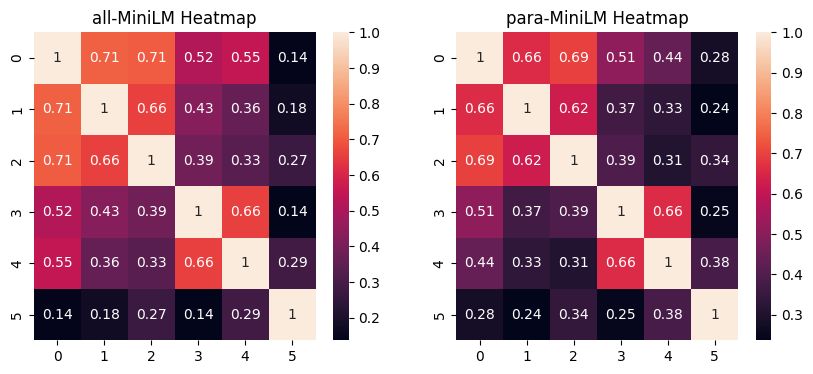

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 4))

# First heatmap
plt.subplot(1, 2, 1)  # 1 row, 3 columns, 1st subplot
sns.heatmap(
    all_mini_cos_similarity,
    annot=True,
    # cmap="coolwarm",
    # xticklabels=batch_txt, yticklabels=batch_txt
)
plt.title("all-MiniLM Heatmap")

# Second heatmap
plt.subplot(1, 2, 2)  # 1 row, 3 columns, 2nd subplot
sns.heatmap(
    para_mini_cos_similarity,
    annot=True,
    # cmap="coolwarm",
    # xticklabels=batch_txt, yticklabels=batch_txt
)
plt.title("para-MiniLM Heatmap")


# Show the plot
plt.show()

We can clearlly observe that sentences `0`, `1`, and `2` are similar to each other, and sentences `3`, `4` are similar to each other. The similarity score is highest for the sentences `0`, `1`, and `2`, and lowest for `3` and `4`.

## Clustering Similar Text

In [ ]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters, n_init="auto")
clustering_model.fit(batch_txt_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(batch_txt[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i + 1)
    print(cluster)
    print("")

### Auto Choosing Cluster Number

**Silhouette score**: The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The optimal number of clusters is often associated with the highest silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for num_clusters in range(2, len(batch_txt)):
    clustering_model = KMeans(n_clusters=num_clusters, n_init="auto")
    cluster_assignment = clustering_model.fit_predict(batch_txt_embeddings)
    silhouette_avg = silhouette_score(batch_txt_embeddings, cluster_assignment)
    silhouette_scores.append(silhouette_avg)

# Adding 2 because silhouette_scores starts from 2 clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print("Optimal number of clusters:", optimal_num_clusters)

# Perform k-mean clustering with optimal number of clusters
clustering_model = KMeans(n_clusters=optimal_num_clusters, n_init="auto")
cluster_assignment = clustering_model.fit_predict(batch_txt_embeddings)

clustered_sentences = [[] for i in range(optimal_num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(batch_txt[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i + 1)
    print(cluster)
    print("")

## Addtional Reading

1. [9 Distance Measures in Data Science](https://www.maartengrootendorst.com/blog/distances/)
2. [MIT Press: Sentence Similarity Based on Contexts](https://direct.mit.edu/tacl/article/doi/10.1162/tacl_a_00477/111218/Sentence-Similarity-Based-on-Contexts) 
3. [Different Techniques for Sentence Semantic Similarity in NLP](https://iq.opengenus.org/different-techniques-for-sentence-semantic-similarity-in-nlp/)